# Computer Assignment 3
# Laplace Analysis/Transform

Kianoush Arshi<br>
810198438



## Table of Contents

* [Requirements](#Requirements)
* [Laplace Analysis](#Laplace-Analysis)
    * [The Circuit](#The-Circuit)
    * [Symbolic Function](#Symbolic-Function)
    * [Setting Conditions for Step Response](#Setting-Conditions-for-Step-Response)
    * [Step Response](#Step-Response)
    * [Capacitor Current](#Capacitor-Current)
    
* [Laplace Transform](#Laplace-Transform)

# Requirements

In [1]:
from lcapy import *
import warnings
warnings.filterwarnings('ignore')

# Laplace Analysis

# The Circuit

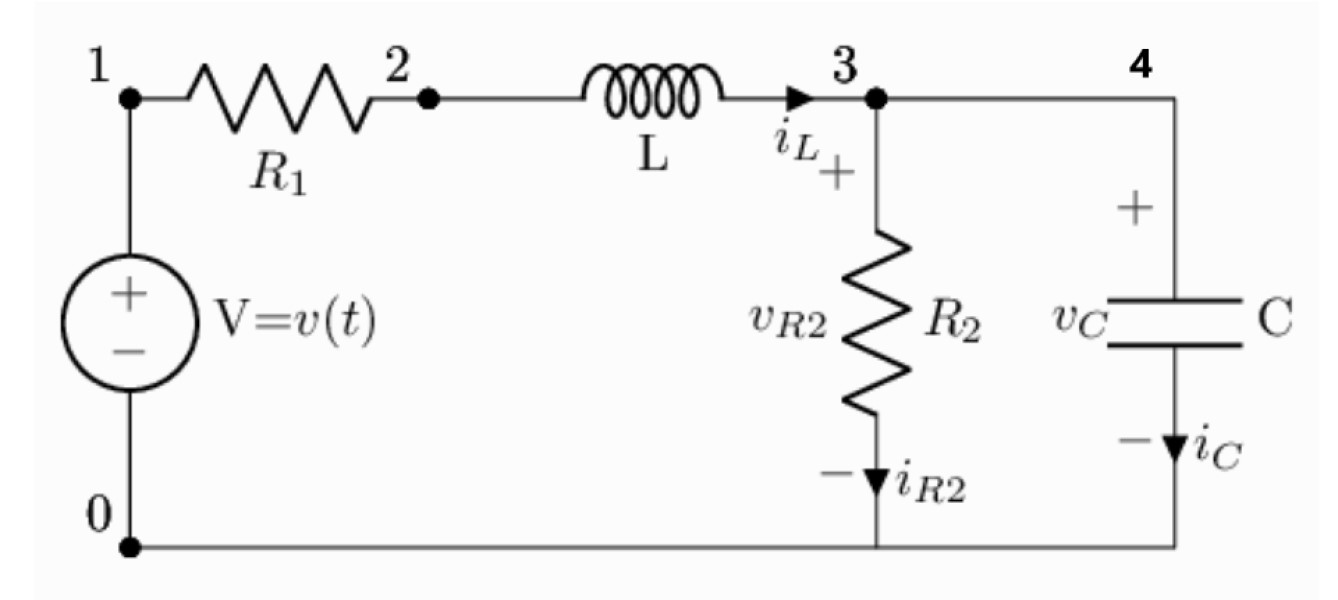

In [2]:
c = Circuit("""
P1 1 0; down=1.5, v=v(t)
R1 1 2; right=1.5
L 2 3; right=1.5
R2 3 0_2; down
W 0 0_2; right
W 3 4; right
W 4 5; right
W 0_2 0_3; right
C 4 0_3; down
W 0_3 0_4; right
P2 5 0_4; down, v^=v_c(t)""")

# Symbolic Function

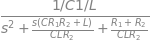

In [3]:
F = c.transfer(1, 0, 5, 0)
F.expr

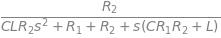

In [4]:
F.simplify().expr

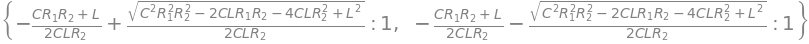

In [5]:
F.poles()

# Setting Conditions for Step Response

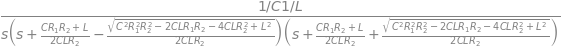

In [6]:
v = expr('u(t)')
V_i = v(s)
V_o = V_i * F
V_o.ZPK().expr

As you can see above, if the two terms under the square root operator become negative, we will have j(imaginary unit) in our response, this will cause the response to have some sine and cosine functions.<br>
To prevent the response from having these functions, we must provide conditions where the two terms are not negative. In order to cover the mentioned condition we have:
$$C^2R_1^2R_2^2-2CLR_1R_2-4CLR_2^2+L^2 >= 0$$
$$(CR_1R_2-L)^2 - 4CLR_2^2 >= 0$$
$$(CR_1R_2-L)^2 >= 4CLR_2^2$$
$$L-CR_1R_2 <= 2R_2\sqrt{CL} <= CR_1R_2-L$$

# Step Response

In this part, we'll get the response of system with the following values:
<li>$R_1 = 4\Omega$
<li>$R_2 = 2\Omega$  
<li>L = 2.5H    
<li>C = 0.25F

In [7]:
cct = c.subs({'R1': 4, 'R2': 2, 'L' : 2.5, 'C' : 0.25})
F = cct.P1.transfer('P2')

v_i = voltage(u(t))
V_i = v_i(s)

In [8]:
V_o = V_i * F
v_o = V_o(t)
v_o.simplify().expr

Notice that we have sin and cos in our response, let's check if the mentioned condition is true or not:<br>
$$2.5 - 0.25x4x2 = 0.5$$
$$0.25x4x2 - 2.5 =-0.5$$
$$2x2x\sqrt{0.25x2.5} \approx 3.6$$
$$3.6 > 0.5$$
Thus, the term will be negative and we'll have sin and cos in our response

In [9]:
ax = v_i.plot((-1, 10), label='input')
ax = v_o.plot((-1, 10), axes=ax, label='output')
ax.legend(loc="best")

# Capacitor Current

In this part, we'll do the above steps for capacitor current $I_C(t)$

In [10]:
c = Circuit("""
P1 1 0; down=1.5, v=v(t)
R1 1 2; right=1.5
L 2 3; right=1.5
R2 3 0_2; down
W 0 0_2; right
W 3 4; right
W 4 5; right
W 0_2 0_3; right
C 4 0_3; down
W 0_3 0_4; right
P2 5 0_4; down, v^=v_c(t)""")

In order to get the new transfer function we must divide the previous transfer function by its impedance.

In [11]:
F2 = c.P1.transfer('P2') * s/4 
F2.expr

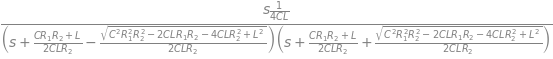

In [12]:
F2.ZPK().expr

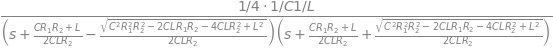

In [13]:
v = expr('u(t)')
v_i = v(s)
i_c = v_i * F2
i_c.ZPK().expr

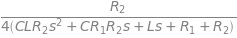

In [14]:
# Or
i_c.ZPK().simplify().expr

In [15]:
F2 = cct.P1.transfer('P2') * s/4
v_i = voltage(u(t))
V_i = v_i(s)

In [16]:
I_o = V_i * F2
i_o = I_o(t)
i_o.expr

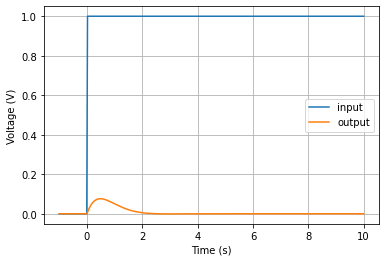

In [17]:
ax = v_i.plot((-1, 10), label='input')
ax = i_o.plot((-1, 10), axes=ax, label='output')
ax.legend(loc="best")

In [18]:
E = 1/(2.5*s**2 + 9*s + 12)
E(t).simplify().expr

       -9⋅t                       
       ─────                      
         5      ⎛√39⋅t⎞           
2⋅√39⋅ℯ     ⋅sin⎜─────⎟           
                ⎝  5  ⎠           
───────────────────────  for t ≥ 0
           39                     

# LaplaceTransform

# The Signal

The signal we're gonna work with is:
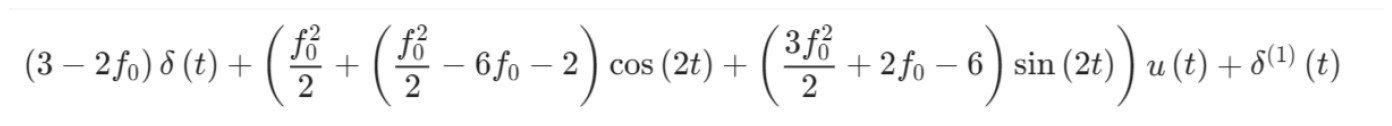

# The Transform

The laplace transform of the above signal is calculated as follows:<br>

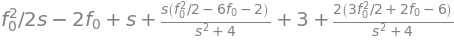

In [19]:
f0 = symbol('f0')
x_t = (3 - 2*f0)*delta(t) + (f0**2/2 + (f0**2/2 - 6*f0 - 2)*cos(2*t) + (3*f0**2/2 + 2*f0 - 6)*sin(2*t))*u(t) + impedance(s)(t)
x_t.LT().expr

# Transform for $f_0$ = 2

In [20]:
x_2 = x_t.subs({'f0' : 2})
x_2.expr 

# Zeros-Poles Plot

In [21]:
X2 = x_2.LT()
X2.plot(xlabel=r'$\sigma$', ylabel=r'$\omega$', title='Zeros-Poles Plot')

<AxesSubplot:title={'center':'Zeros-Poles Plot'}, xlabel='$\\sigma$', ylabel='$\\omega$'>